In [7]:
#Loading in code and data
from kinetic import KineticScan
from spatialScan import SpatialScan
import matplotlib.pyplot as plt
import glob
import re


# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
#Getting all data
file = glob.glob('**/*.dat', recursive=True)
AllDataObjs = []

for fpath in file:
    try:
        #Getting the file name and trimming .dat extention and /
        fname = re.findall('\/D\d-.+', fpath)[0][1:-4]
    except:
        print(f'ERROR: Could not open {fpath}: Bad re exspression')
        continue
        
    try:
        if 'KIN' in fname:
            data = KineticScan(filepath=fpath, label=fname)
        else:
            data = SpatialScan(filepath=fpath, label=fname)
        AllDataObjs.append(data)
    except Exception as e:
        print(f'ERROR: Could not read {fpath}: {e.__class__}')
        print(e)

D5-R2-PDI-Nanocrystal-6-14-21-t0 _GV; 0


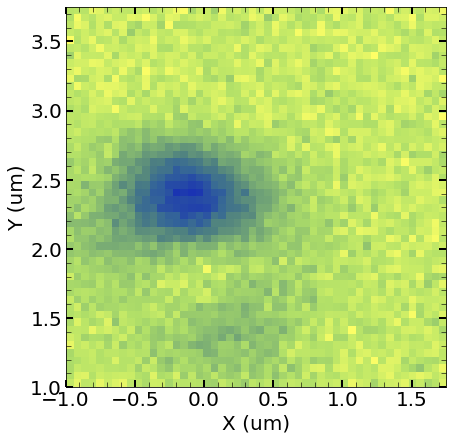

D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 1


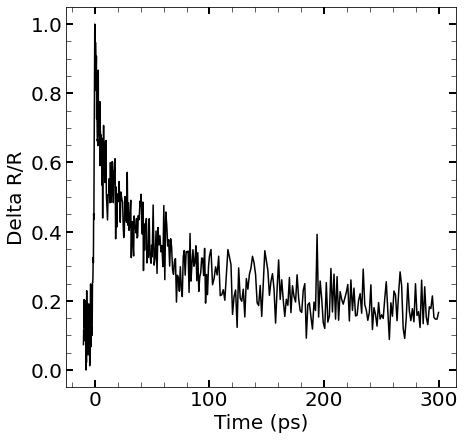

D5-R3-PDI-Nanocrystal-6-14-21 _KIN; 2


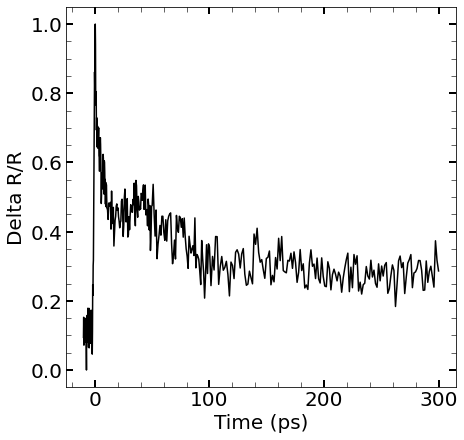

D5-R3-PDI-Nanocrystal-6-14-21-t0_GV; 3


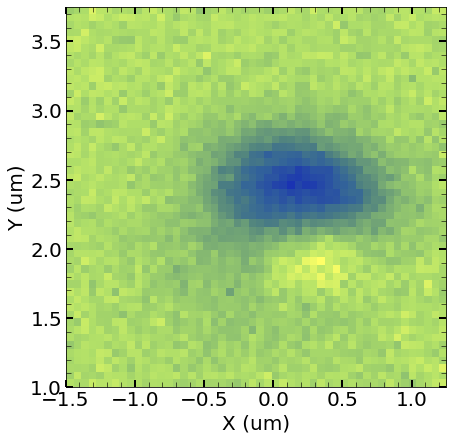

D5-R3-PDI-Nanocrystal-6-14-21-t0_KIN; 4


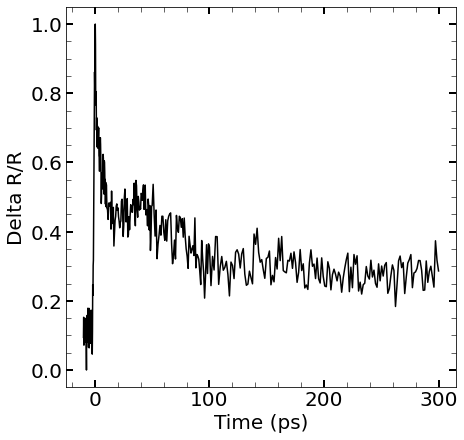

D5-R1-PDI-Nanocrystal-6-14-21-t0 k1_KIN; 36


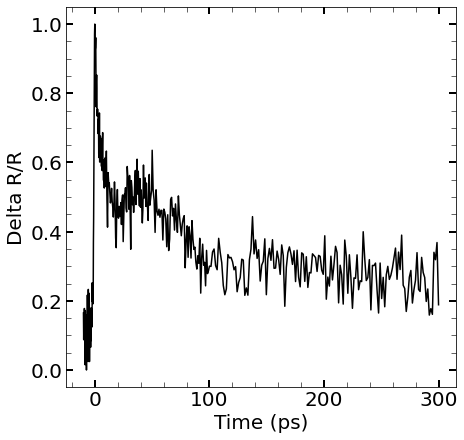

D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 37


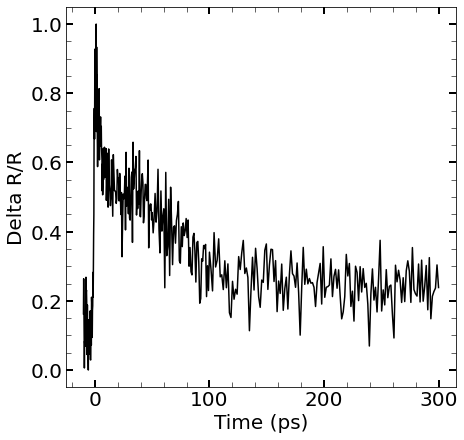

D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 38


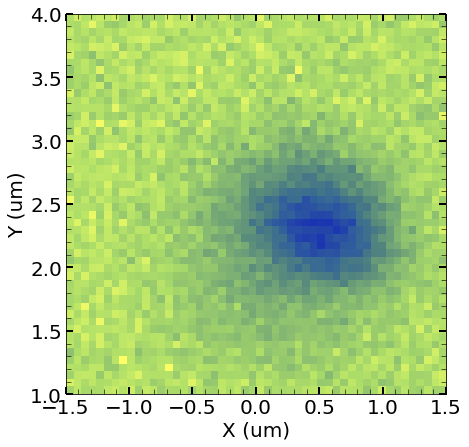

D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 39


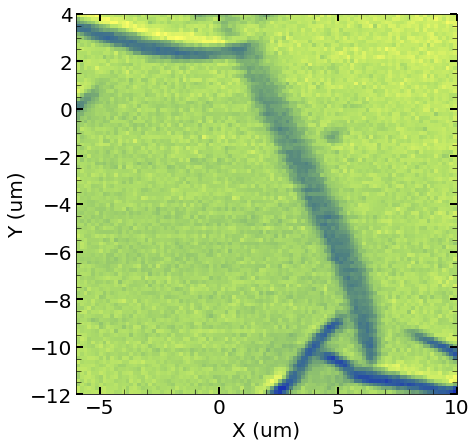

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_GV; 82


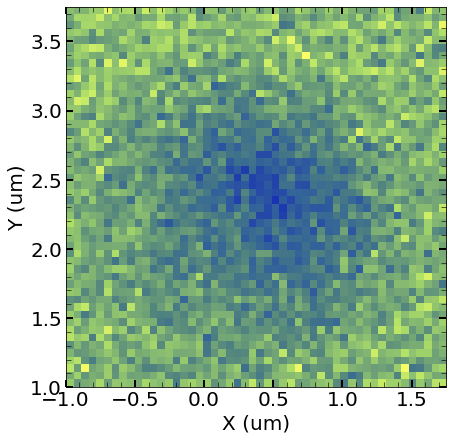

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_NP; 83


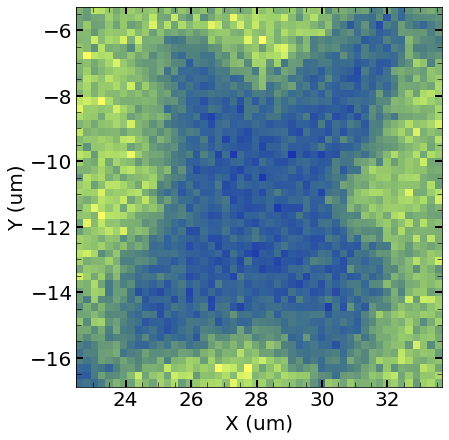

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_GV; 84


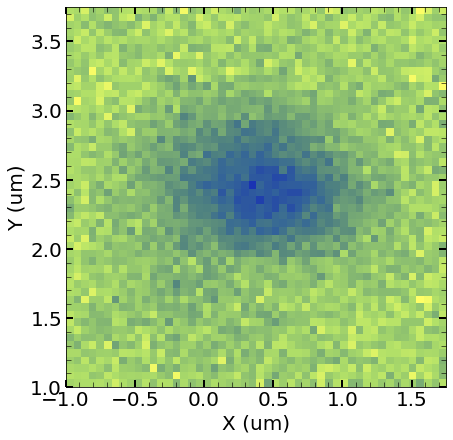

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_NP; 85


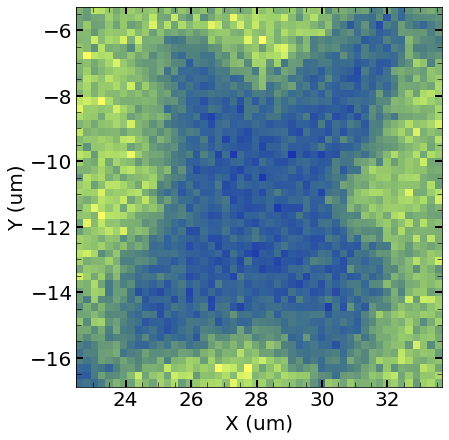

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_GV; 86


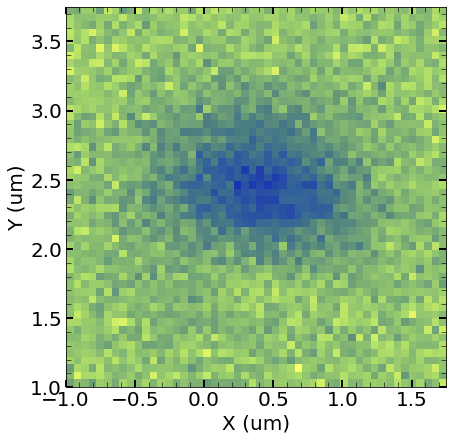

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_NP; 87


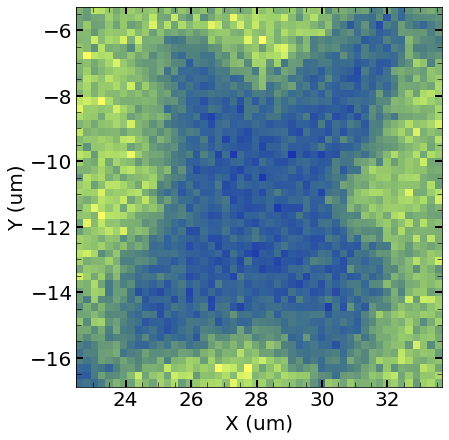

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_GV; 88


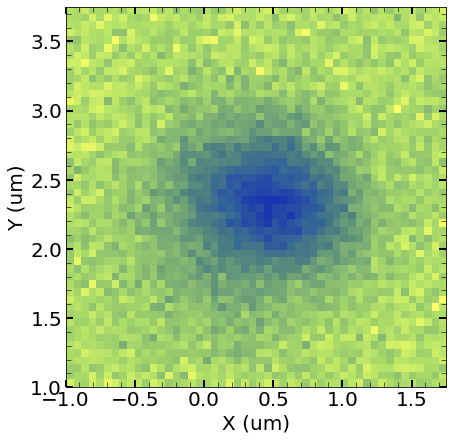

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_NP; 89


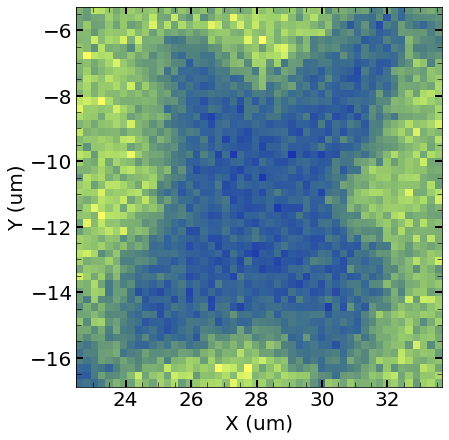

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_GV; 90


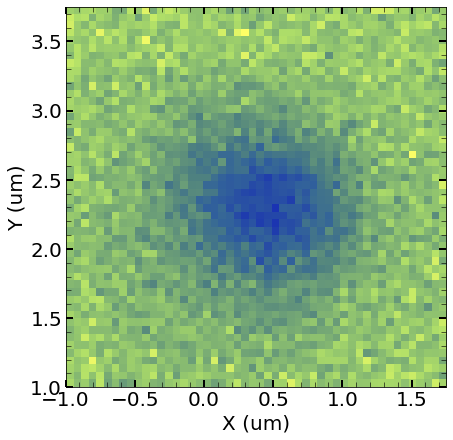

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_NP; 91


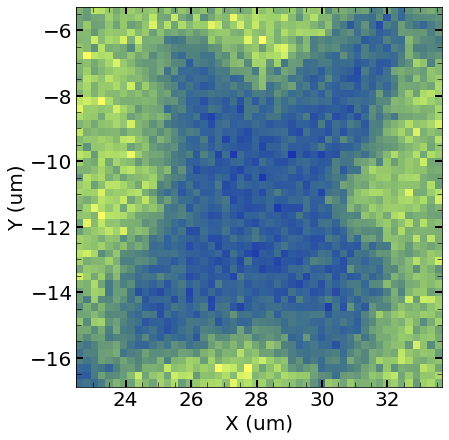

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_GV; 92


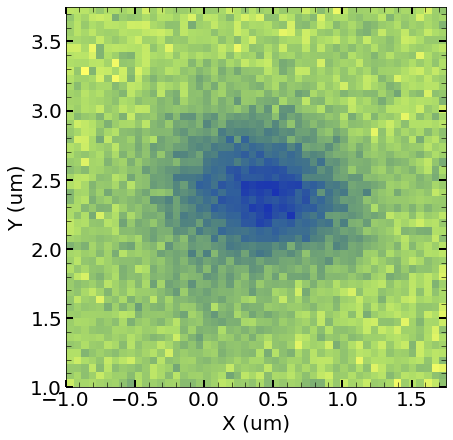

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_NP; 93


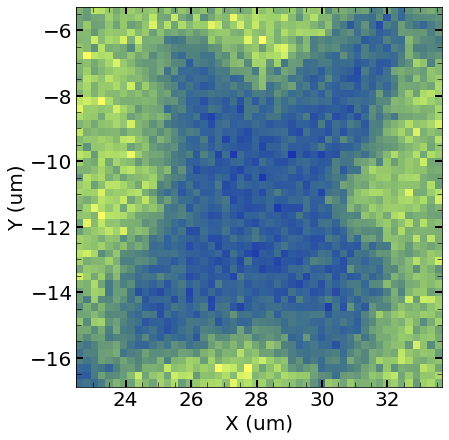

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_GV; 94


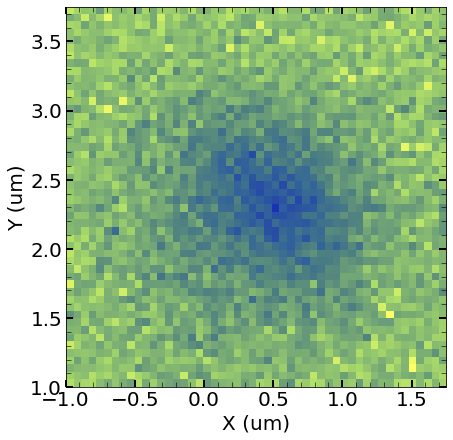

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_NP; 95


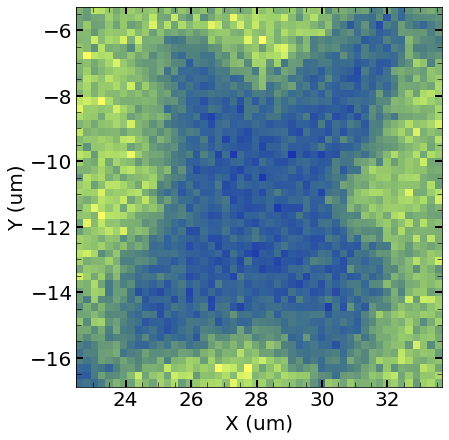

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_GV; 96


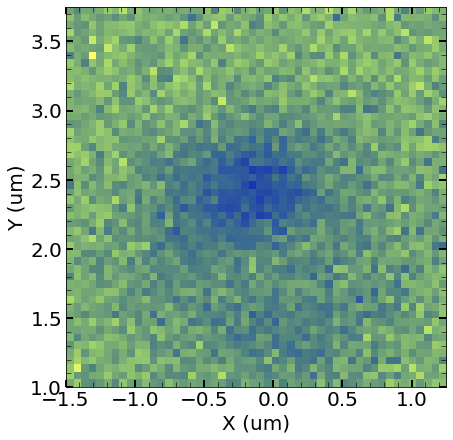

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_NP; 97


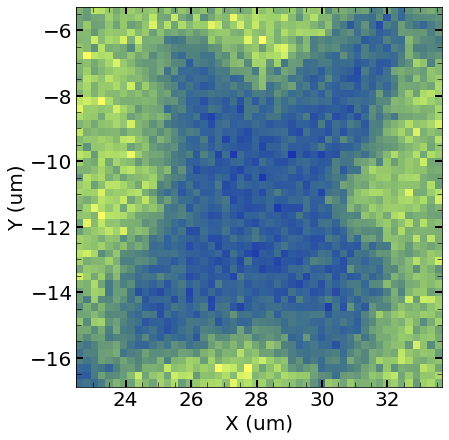

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_GV; 98


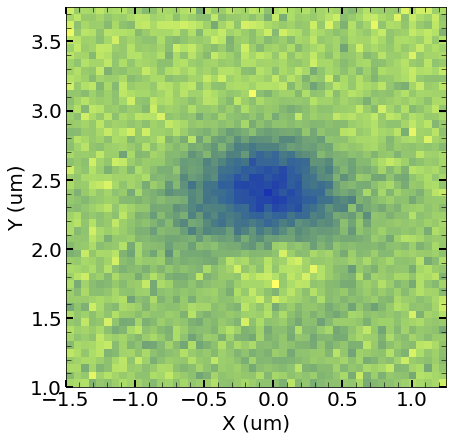

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_NP; 99


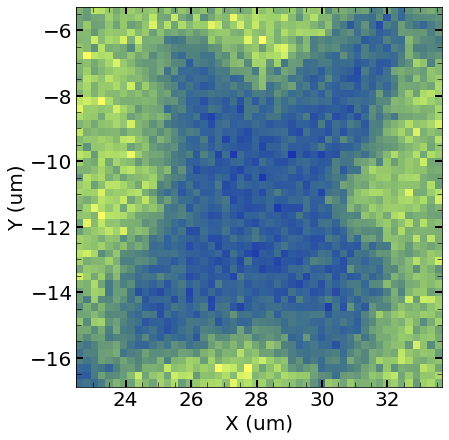

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_GV; 100


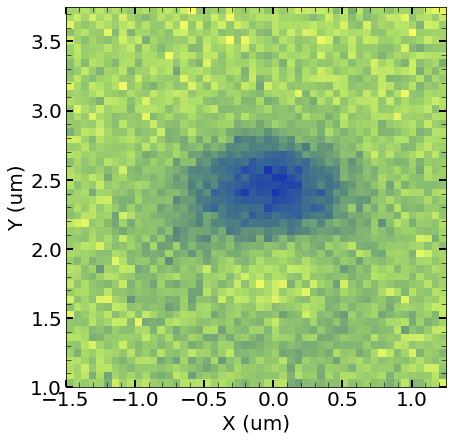

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_NP; 101


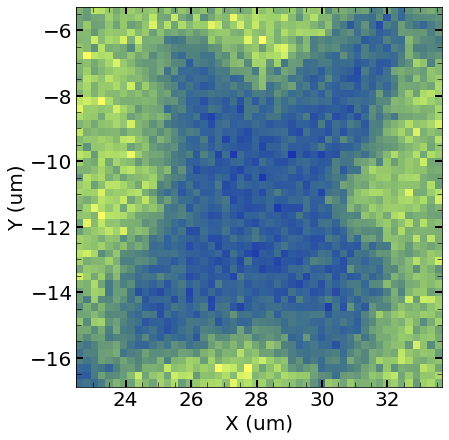

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_GV; 102


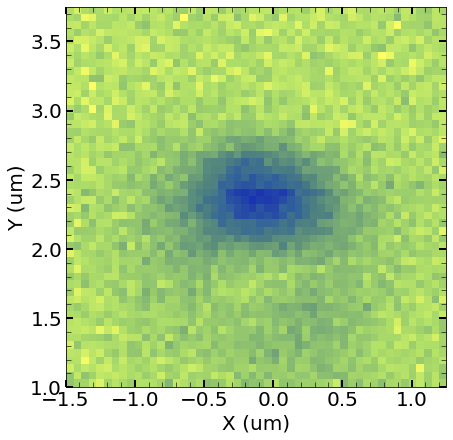

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_NP; 103


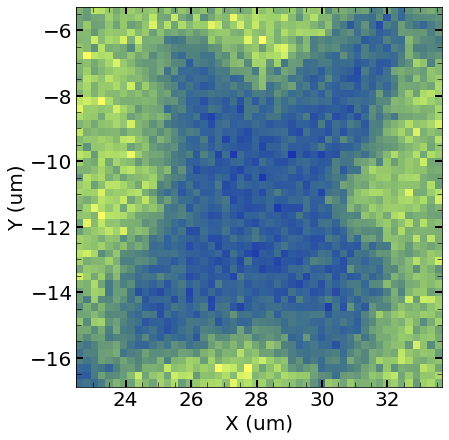

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_GV; 104


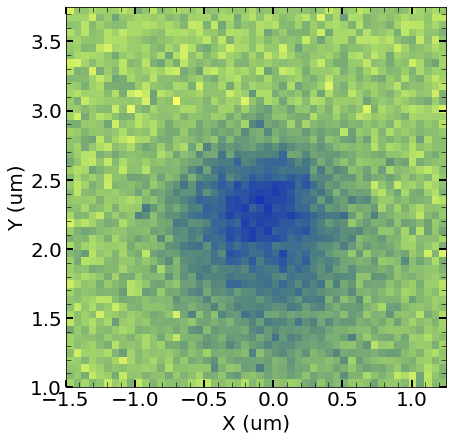

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_NP; 105


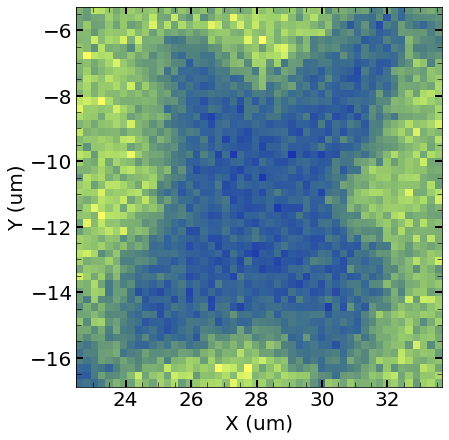

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_GV; 106


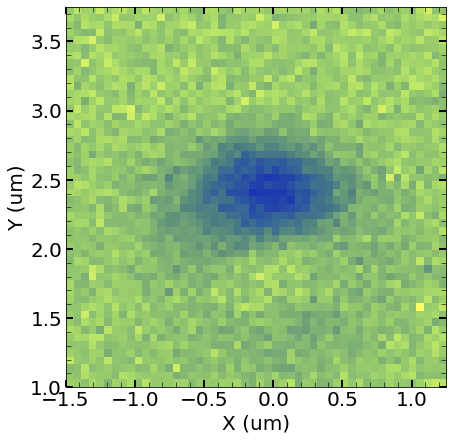

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_NP; 107


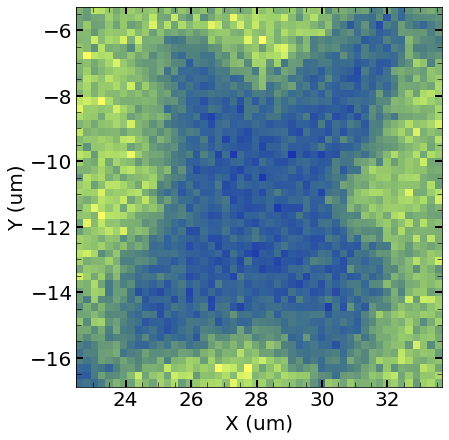

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_GV; 108


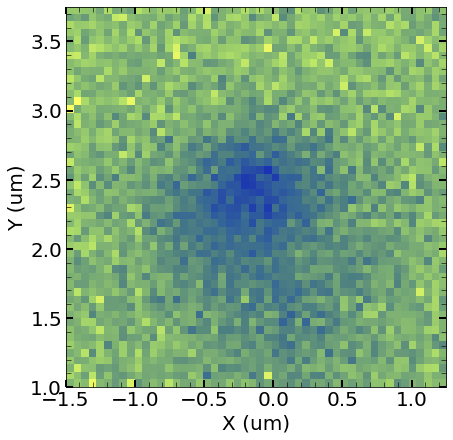

D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_NP; 109


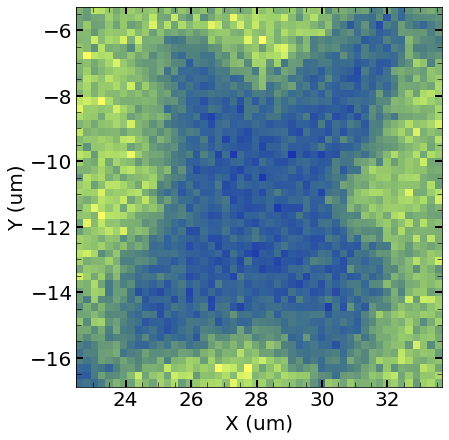

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-100ps_GV; 110


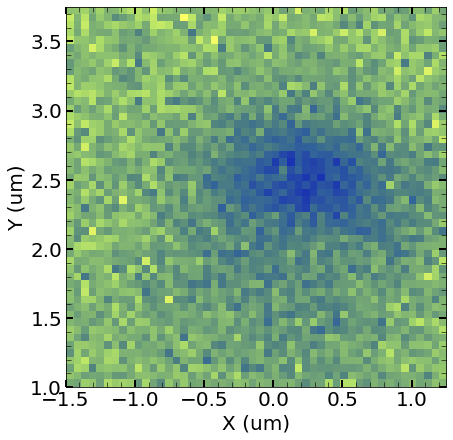

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-100ps_NP; 111


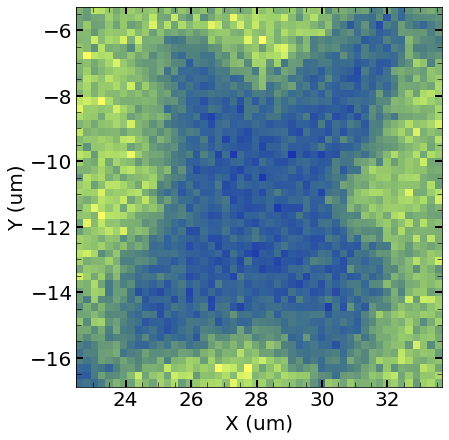

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-10ps_GV; 112


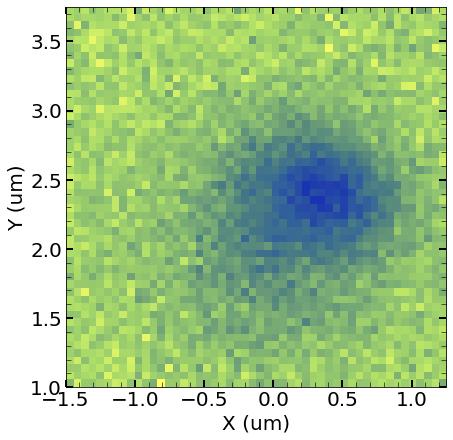

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-10ps_NP; 113


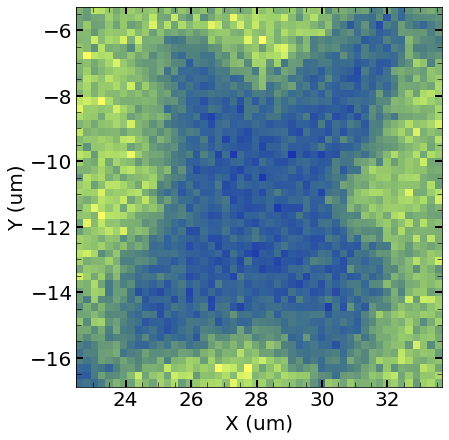

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-15ps_GV; 114


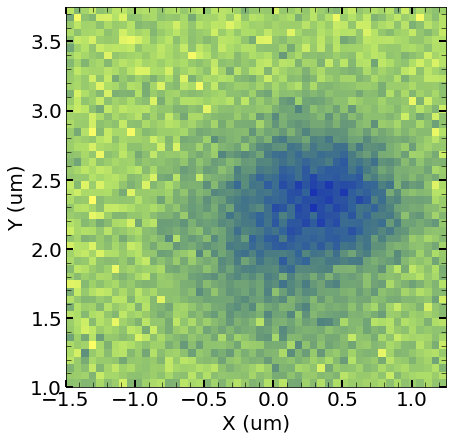

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-15ps_NP; 115


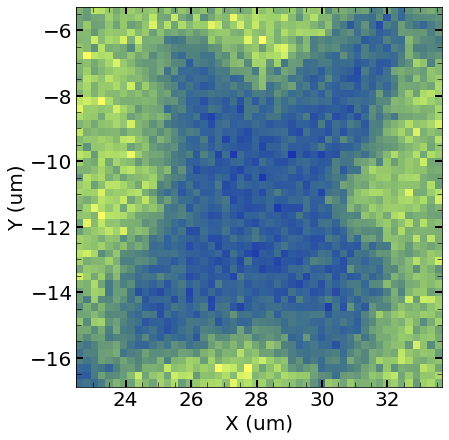

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-1ps_GV; 116


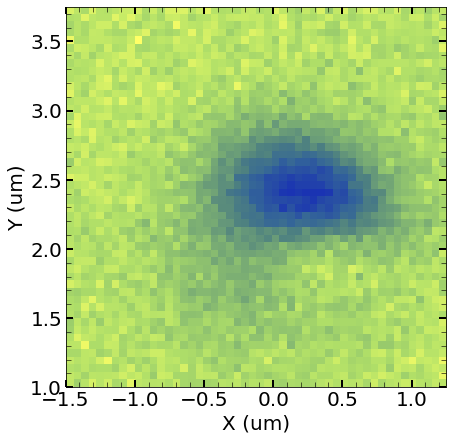

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-1ps_NP; 117


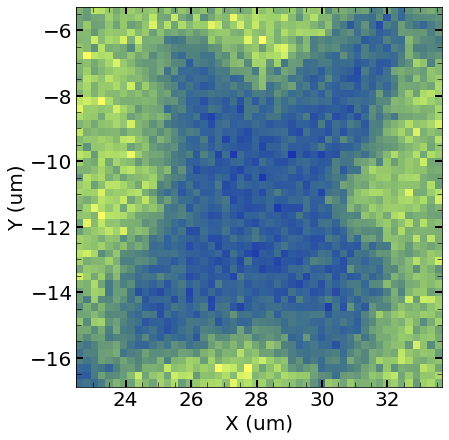

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-40ps_GV; 118


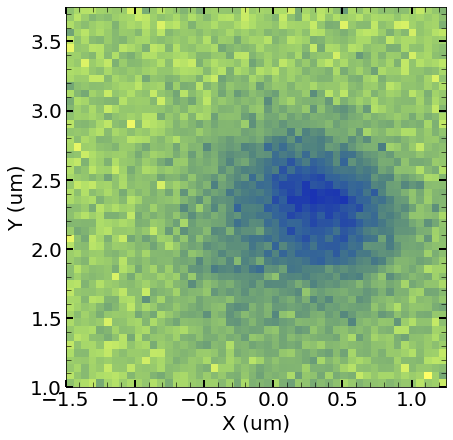

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-40ps_NP; 119


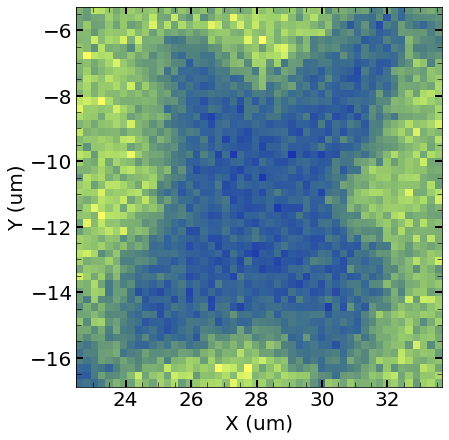

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-5ps_GV; 120


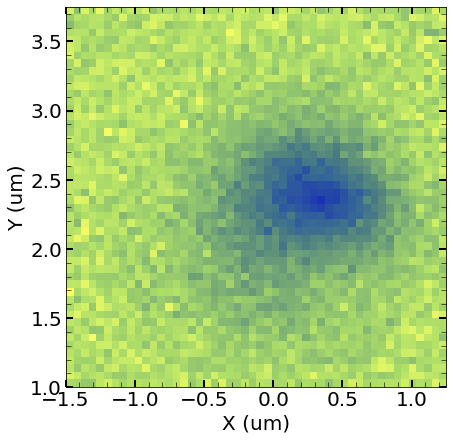

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-5ps_NP; 121


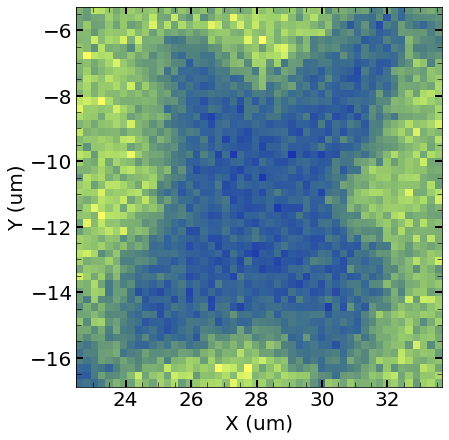

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-80ps_GV; 122


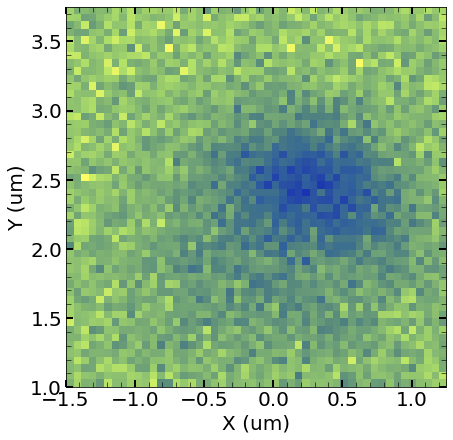

D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-80ps_NP; 123


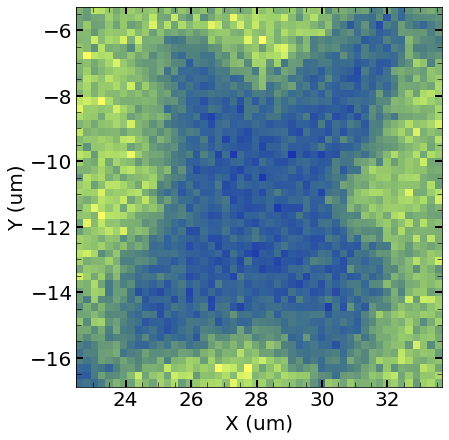

D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 125


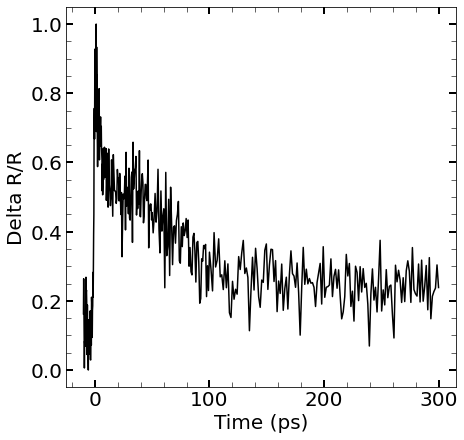

D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 126


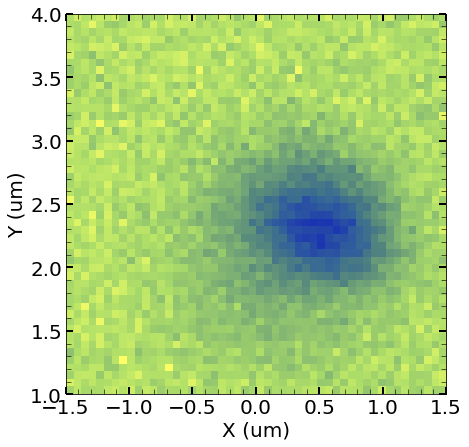

D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 127


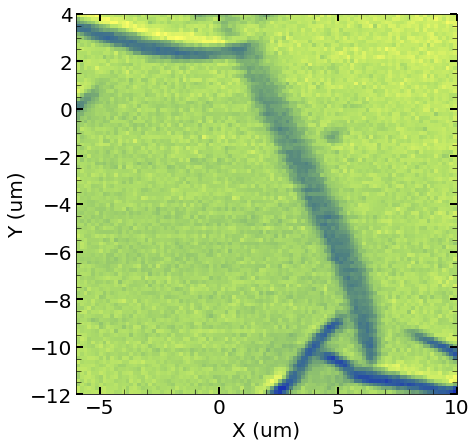

D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 128


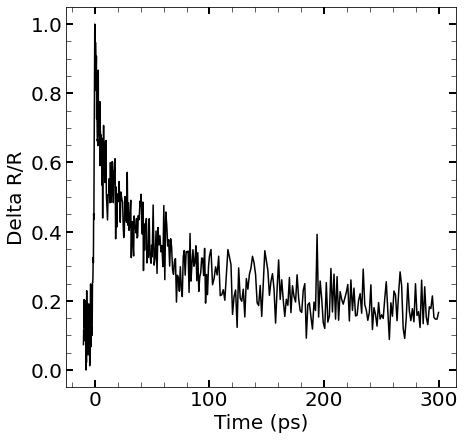

In [45]:
#Plotting all D3 data to be looked through
for i, o in enumerate(AllDataObjs):
    if 'D5' in o.get_label():
        print(f'{o.get_label()}; {i}')
        ax = o.visualize()
        if type(o) == KineticScan:
            params = o.fitCurve()
            o.plotFit(params, ax=ax)
        plt.show()
    

D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 0
D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 1
D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 2
D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 3
D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 4
D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 5
D5-R2-PDI-Nanocrystal-6-14-21-t0 _GV; 6


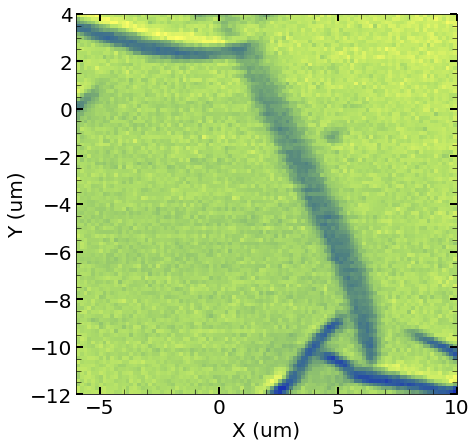

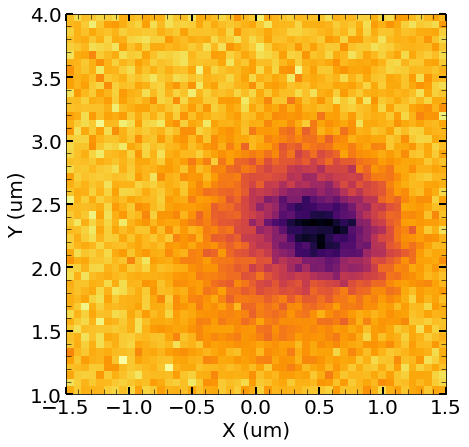

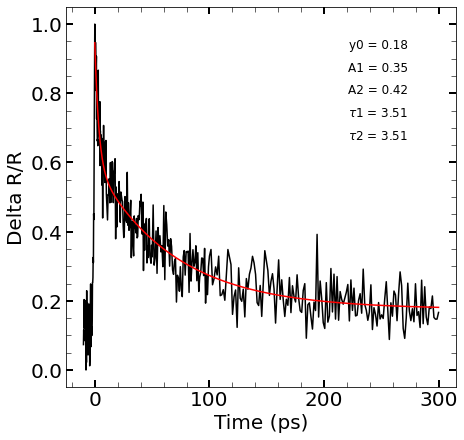

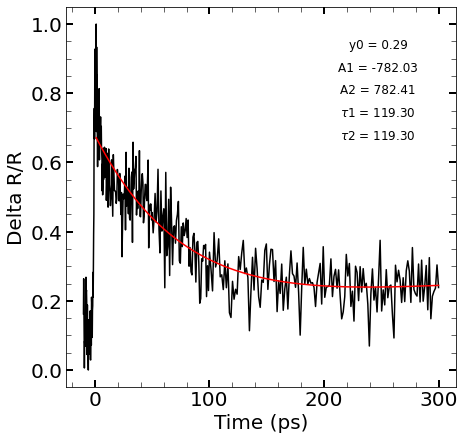

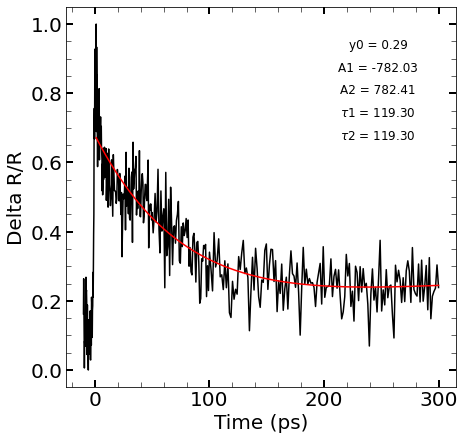

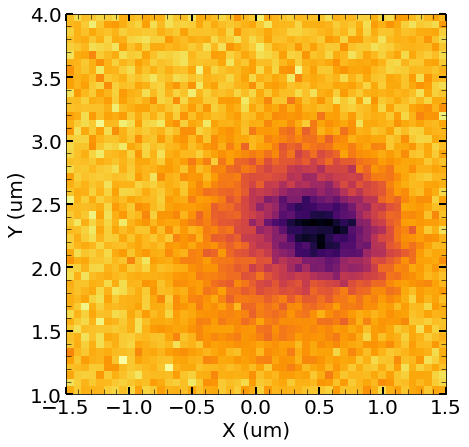

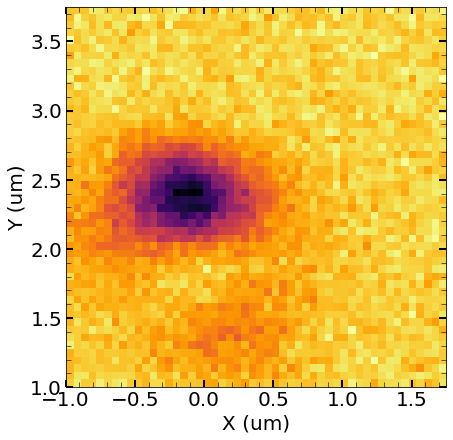

In [83]:
#Saving t0 scans
t0 = [AllDataObjs[i] for i in [39,126,128,125,37,38, 0]]


for i, o in enumerate(t0):
    fname = o.get_label()
    print(f'{fname}; {i}')
    if 'GV' in fname:
        ax = o.visualize(cmap='inferno')
    else:
        ax = o.visualize()
    if 'KIN' in fname:
        params = o.fitCurve()
        o.plotFit(params, ax=ax)
    plt.savefig(f'outputs/{fname}.png')

